## Estimadores de la función de correlación
## Implementación en Python 
### José Alberto Moreno Guerra

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import scipy.stats as st
from random import random
import matplotlib.pyplot as plt
import math 
from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs
plt.style.use('classic')
%matplotlib inline

In [2]:
global vtx, vty
vtx = []
vty = []
def anillos(R,r,n,i):
    tcx=np.zeros(n)
    tcy=np.zeros(n)
    tcz=np.zeros(n)
    np.random.seed(i)
    centro1=(random()-0.5)*1000.0
    centro2=(random()-0.5)*1000.0
    for i in range(n):
        alpha=np.random.uniform(0, 2.*np.pi)
        beta=np.random.uniform(0, 2.*np.pi)
        x2=(R+r*math.cos(alpha))*math.cos(beta)-centro1
        y2=(R+r*math.cos(alpha))*math.sin(beta)-centro2
        z2=r*math.sin(alpha)
        check=math.sqrt(x1*x1+y1*y1)
        #if(check<=(R+r*math.cos(alpha))):
        tcx[i]=x2
        tcy[i]=y2
        vtx.append(tcx[i])
        vty.append(tcy[i])
        tcz[i]=z2
    plt.plot(tcx,tcy, 'b.')
    circle = plt.Circle((-centro1, -centro2), (R-r)-10.0, color='r', fill=False)
    plt.gcf().gca().add_artist(circle)
    circle = plt.Circle((-centro1, -centro2), (R+r)+10.0, color='r', fill=False)
    plt.gcf().gca().add_artist(circle)

### Generamos varias distribuciones de puntos, una aleatoria 

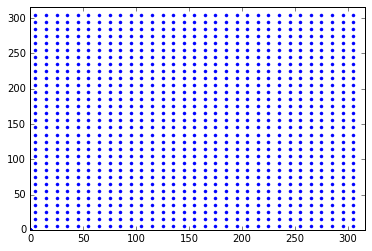

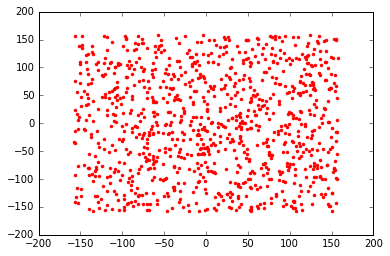

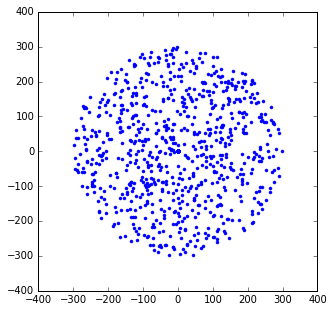

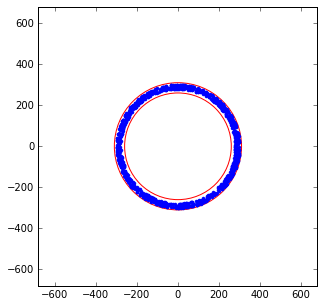

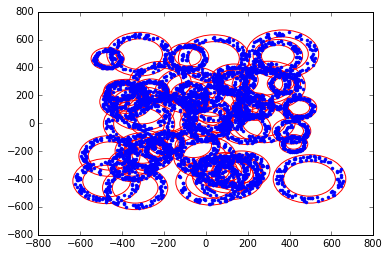

In [3]:
n=1000
rho=0.01
dim=np.sqrt(n/rho)
d=dim/np.sqrt(n)
x=np.zeros(n)
y=np.zeros(n)
radx=[]
rady=[]
k=0
for i in range(int(dim/d)):
    for j in range(int(dim/d)):   
        x[k]=(d/2)+d*i
        y[k]=(d/2)+d*j
        k=k+1
for i in range(n):
    radx.append((random()-0.5)*dim)
    rady.append((random()-0.5)*dim)
plt.plot(x,y, 'b.')
plt.axis([0.0, dim, 0.0, dim]) 
plt.show()
plt.plot(radx,rady, 'r.')
plt.show()

dia=600.0
lx=np.zeros(n)
ly=np.zeros(n)
for i in range(n):
    x1=np.random.uniform(-dia/2.0,dia/2.0)
    y1=np.random.uniform(-dia/2.0,dia/2.0)
    r=math.sqrt(x1*x1+y1*y1)
    if(r<=dia/2.0):
        lx[i]=x1
        ly[i]=y1
plt.figure(figsize=(5,5))
plt.plot(lx,ly, 'b.')
plt.axis([-(dia/2.0+100), (dia/2.0+100), -(dia/2.0+100), (dia/2.0+100)]) 
plt.show()

R=290.0
r=10.0
tx=np.zeros(n)
ty=np.zeros(n)
tz=np.zeros(n)
for i in range(n):
    alpha=np.random.uniform(0, 2.*np.pi)
    beta=np.random.uniform(0, 2.*np.pi)
    x2=(R+r*math.cos(alpha))*math.cos(beta)
    y2=(R+r*math.cos(alpha))*math.sin(beta)
    z2=r*math.sin(alpha)
    check=math.sqrt(x1*x1+y1*y1)
    tx[i]=x2
    ty[i]=y2
    tz[i]=z2
plt.figure(figsize=(5,5))
plt.plot(tx,ty, 'b.')
circle = plt.Circle((0, 0), 260, color='r', fill=False)
plt.gcf().gca().add_artist(circle)
circle = plt.Circle((0, 0), 310, color='r', fill=False)
plt.gcf().gca().add_artist(circle)
plt.axis([-(2*R+100), (2*R+100), -(2*R+100), (2*R+100)]) 
plt.show()

for i in range(50):
    np.random.seed(i)
    z=(1-(random()-0.5))*100
    c=z/10.0
    anillos(z,c,100,i)
plt.figure(figsize=(15,15))
plt.show()

### Estimador de Hamilton 

$\zeta (r)=\frac{DD(r)-RR(r)}{DR(r)^{2}}$

In [4]:
def hamilton(x,y,xrand,yrand,dim,t_bins):
    global xf, err
    n = np.size(x)
    dmax = math.sqrt(2.0*(dim**2))
    ran = dmax/t_bins
    bins=np.linspace(0.0,dmax,t_bins)
    rdist = []
    drand = []
    DR = []
    gr = np.zeros(t_bins)
    grand = np.zeros(t_bins)
    grd = np.zeros(t_bins)
    
    errh = np.zeros(t_bins)
    for i in range(n):
        for j in range(i+1,n-1):
            r_dr = math.sqrt(((x[i]-xrand[j])**2)+(y[i]-yrand[j])**2)
            r = math.sqrt(((x[i]-x[j])**2)+(y[i]-y[j])**2)
            r_rand = math.sqrt(((xrand[i]-xrand[j])**2)+(yrand[i]-yrand[j])**2)
            rdist.append(r)
            drand.append(r_rand)
            DR.append(r_dr)
    for i in range(t_bins):
        for j in range(n):
            r = np.uint32((rdist[j])/ran)
            r_rand = np.uint32((drand[j])/ran)
            r_dr = np.uint32((DR[j])/ran)
            if(r<dmax):
                if(r<t_bins):
                    gr[int(r)]=gr[int(r)]+1
            if(r_rand<dmax):
                if(r_rand<t_bins):
                    grand[int(r_rand)]=grand[int(r_rand)]+1
            if(r_dr<dmax):
                if(r_dr<t_bins):
                    grd[int(r_dr)]=grd[int(r_dr)]+1
    for i in range(t_bins):
        if(grd[i]!=0):
            errh[i]=(abs(gr[i]-grand[i])/(grd[i]**2.))
    xfh=np.linspace(0,dmax,np.size(errh))
    plt.plot(xfh,errh/np.max(errh),'o-', label='Hamilton')
    plt.xlabel("$r$",fontsize = 20)   # Establece el título del eje x
    plt.ylabel("$\zeta (r)$",fontsize = 20)   # Establece el título del eje y

### Estimador de Peebles-Hauser

$\zeta (r)=\left ( \frac{r_{o}}{r} \right )^{\gamma }$ with $\gamma = 1.77$ and $r_{o}^{\gamma}=5.4$

In [5]:
def PHauser(x,y,dim,t_bins):
    global xf, err
    n = np.size(x)
    dmax = math.sqrt(2.0*(dim**2))
    ran = dmax/t_bins
    bins=np.linspace(0.0,dmax,t_bins)
    rdist = []
    gr = np.zeros(t_bins)
    
    errph = np.zeros(t_bins)
    for i in range(n):
        for j in range(i+1,n-1):
            r = math.sqrt(((x[i]-x[j])**2)+(y[i]-y[j])**2)
            rdist.append(r)
    for i in range(t_bins):
        for j in range(n):
            r = np.uint32((rdist[j])/ran)
            if(r<dmax):
                if(r<t_bins):
                    gr[int(r)]=gr[int(r)]+1
    for i in range(t_bins):
        if(gr[i]!=0):
            errph[i] = np.max(gr)*(5.4/(gr[i]))**1.66
    xfph=np.linspace(0,dmax,np.size(errph))
    plt.plot(xfph,errph/np.max(errph),'o-', label='Peebles-Hauser')
    plt.xlabel("$r$",fontsize = 20)   # Establece el título del eje x
    plt.ylabel("$\zeta (r)$",fontsize = 20)   # Establece el título del eje y

### De Davis-Peebles

$\zeta (r)=\frac{N_{rd}}{N}\frac{DD(r)}{DR(r)}-1$

In [6]:
def DPeebles(x,y,xrand,yrand,dim,t_bins):
    global xf, err
    nrd = np.size(xrand)
    n = np.size(x)
    dmax = math.sqrt(2.0*(dim**2))
    ran = dmax/t_bins
    bins=np.linspace(0.0,dmax,t_bins)
    rdist = []
    DR = []
    gr = np.zeros(t_bins)
    grand = np.zeros(t_bins)
    grd = np.zeros(t_bins)
    
    errdp = np.zeros(t_bins)
    for i in range(n):
        for j in range(i+1,n-1):
            r_dr = math.sqrt(((x[i]-xrand[j])**2)+(y[i]-yrand[j])**2)
            r = math.sqrt(((x[i]-x[j])**2)+(y[i]-y[j])**2)
            r_rand = math.sqrt(((xrand[i]-xrand[j])**2)+(yrand[i]-yrand[j])**2)
            rdist.append(r)
            DR.append(r_dr)
    for i in range(t_bins):
        for j in range(n):
            r = np.uint32((rdist[j])/ran)
            r_dr = np.uint32((DR[j])/ran)
            if(r<dmax):
                if(r<t_bins):
                    gr[int(r)]=gr[int(r)]+1
            if(r_dr<dmax):
                if(r_dr<t_bins):
                    grd[int(r_dr)]=grd[int(r_dr)]+1
    for i in range(t_bins):
        if(grd[i]!=0):
            errdp[i]=(nrd/n)*(gr[i]/grd[i])-1
    xfdp=np.linspace(0,dmax,np.size(errdp))
    plt.plot(xfdp,errdp/np.max(errdp),'o-', label='Davis-Peebles')
    plt.xlabel("$r$",fontsize = 20)   # Establece el título del eje x
    plt.ylabel("$\zeta (r)$",fontsize = 20)   # Establece el título del eje y

### Estimador de Landy-Szalay 

$\zeta (r)=1+\left ( \frac{N_{rd}}{N} \right )^{2}\frac{DD(r)}{RR(r)}-2\frac{N_{rd}}{N}\frac{DR(r)}{RR(r)}$

In [7]:
def LSzalay(x,y,xrand,yrand,dim,t_bins):
    global xf, err
    nrd = np.size(xrand)
    n = np.size(x)
    dmax = math.sqrt(2.0*(dim**2))
    ran = dmax/t_bins
    bins=np.linspace(0.0,dmax,t_bins)
    rdist = []
    drand = []
    DR = []
    gr = np.zeros(t_bins)
    grand = np.zeros(t_bins)
    grd = np.zeros(t_bins)
    
    errls = np.zeros(t_bins)
    for i in range(n):
        for j in range(i+1,n-1):
            r_dr = math.sqrt(((x[i]-xrand[j])**2)+(y[i]-yrand[j])**2)
            r = math.sqrt(((x[i]-x[j])**2)+(y[i]-y[j])**2)
            r_rand = math.sqrt(((xrand[i]-xrand[j])**2)+(yrand[i]-yrand[j])**2)
            rdist.append(r)
            drand.append(r_rand)
            DR.append(r_dr)
    for i in range(t_bins):
        for j in range(n):
            r = np.uint32((rdist[j])/ran)
            r_rand = np.uint32((drand[j])/ran)
            r_dr = np.uint32((DR[j])/ran)
            if(r<dmax):
                if(r<t_bins):
                    gr[int(r)]=gr[int(r)]+1
            if(r_rand<dmax):
                if(r_rand<t_bins):
                    grand[int(r_rand)]=grand[int(r_rand)]+1
            if(r_dr<dmax):
                if(r_dr<t_bins):
                    grd[int(r_dr)]=grd[int(r_dr)]+1
    for i in range(t_bins):
        if(grand[i]!=0):
            errls[i]=(1+(((nrd/n)**2.)*(gr[i]/grand[i]))-2*(nrd/n)*(grd[i]/grand[i]))
    xfls=np.linspace(0,dmax,np.size(errls))
    plt.plot(xfls,errls/np.max(errls),'o-', label='Landy-Szalay')
    plt.xlabel("$r$",fontsize = 20)   # Establece el título del eje x
    plt.ylabel("$\zeta (r)$",fontsize = 20)   # Establece el título del eje y

## Funcion de correlación para la Malla con diferentes estimadores

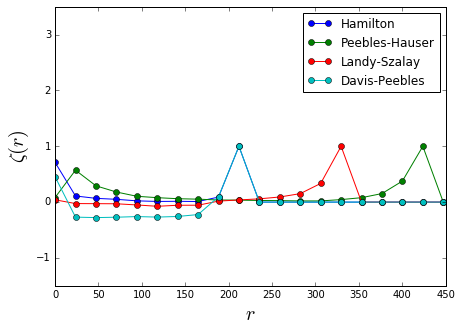

In [8]:
plt.figure(figsize=(7,5))
hamilton(x,y,radx,rady,dim,20)
PHauser(x,y,dim,20)
LSzalay(x,y,radx,rady,dim,20)
DPeebles(x,y,radx,rady,dim,20)
plt.axis([0.0,450.0 , -1.5, 3.5]) 
plt.legend()
plt.show()

## Funcion de correlación para el disco con diferentes estimadores

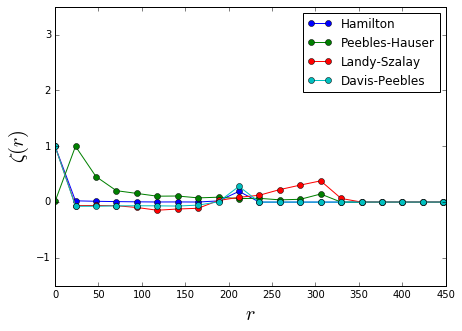

In [9]:
plt.figure(figsize=(7,5))
hamilton(lx,ly,radx,rady,dim,20)
PHauser(lx,ly,dim,20)
LSzalay(lx,ly,radx,rady,dim,20)
DPeebles(lx,ly,radx,rady,dim,20)
plt.axis([0.0,450.0 , -1.5, 3.5]) 
plt.legend()
plt.show()

## Funcion de correlación para el anillo con diferentes estimadores

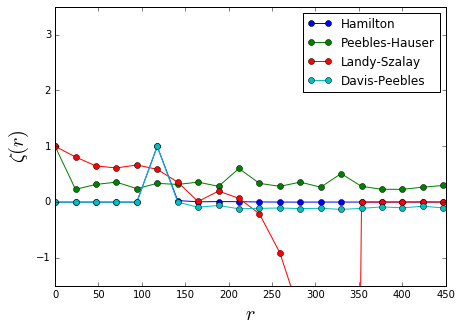

In [10]:
plt.figure(figsize=(7,5))
hamilton(tx,ty,radx,rady,dim,20)
PHauser(tx,ty,dim,20)
LSzalay(tx,ty,radx,rady,dim,20)
DPeebles(tx,ty,radx,rady,dim,20)
plt.axis([0.0,450.0 , -1.5, 3.5]) 
plt.legend()
plt.show()

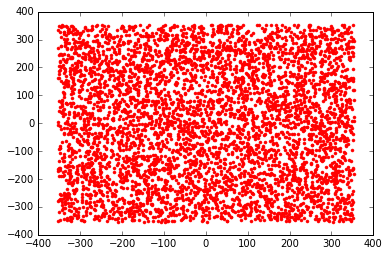

In [11]:
n=np.size(vtx)
rho=0.01
dim=np.sqrt(n/rho)
d=dim/np.sqrt(n)
radx=[]
rady=[]
for i in range(n):
    radx.append((random()-0.5)*dim)
    rady.append((random()-0.5)*dim)
plt.plot(radx,rady, 'r.')
plt.show()

## Funcion de correlación para los 50 anillos con diferentes estimadores

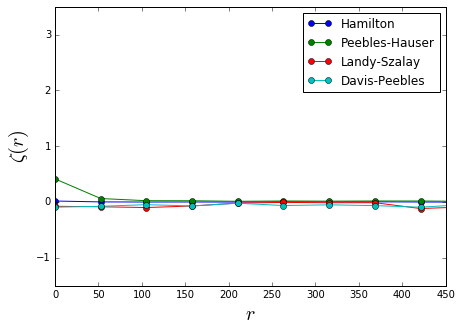

In [12]:
plt.figure(figsize=(7,5))
hamilton(vtx,vty,radx,rady,dim,20)
PHauser(vtx,vty,dim,20)
LSzalay(vtx,vty,radx,rady,dim,20)
DPeebles(vtx,vty,radx,rady,dim,20)
plt.axis([0.0,450.0 , -1.5, 3.5]) 
plt.legend()
plt.show()